In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import warnings
from itertools import product 
from datetime import datetime

In [2]:
df = pd.read_csv('shanghai_1990-12-19_to_2019-2-28.csv')
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp
df.head()

,Timestamp,Price
Timestamp,,
1990-12-19,1990-12-19,96.05
1990-12-20,1990-12-20,104.30
1990-12-21,1990-12-21,109.07
1990-12-24,1990-12-24,113.57
1990-12-25,1990-12-25,120.09


In [3]:
df_month = df.resample('M').mean()
df_Q = df.resample('Q-DEC').mean()
df_year = df.resample('A-DEC').mean()

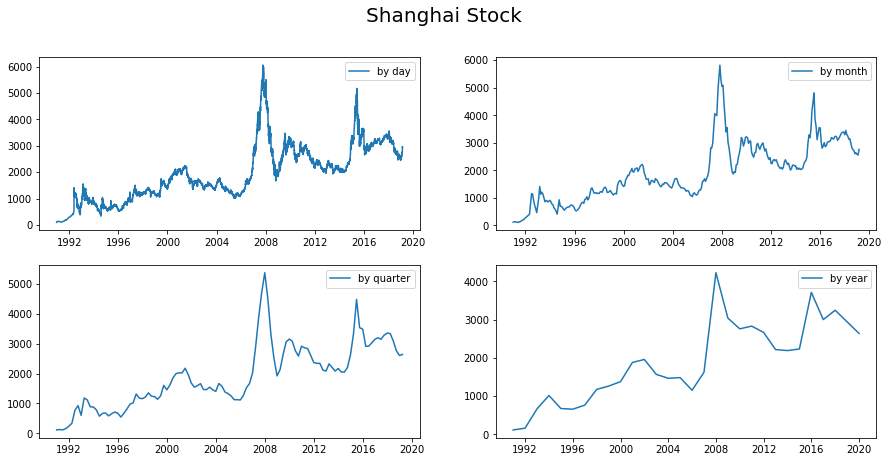

In [4]:
fig = plt.figure(figsize=[15,7])
plt.suptitle('Shanghai Stock',fontsize=20)
plt.subplot(221)
plt.plot(df.Price, '-', label='by day')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Price, '-', label='by month')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Price, '-', label='by quarter')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Price, '-', label='by year')
plt.legend()

plt.show()

In [5]:
ps = range(0,3)
qs = range(0,3)
parameters = product(ps,qs)
parameters_list = list(parameters)
print(parameters_list)

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


In [6]:
results = []
best_aic = float('infinity')
for param in parameters_list:
    try:
        model = ARMA(df_month.Price, order=(param[0], param[1])).fit()
    except ValueError:
        print('Wrong parameter:', param)
        continue
    aic = model.aic
    if aic <= best_aic:
        best_model = model
        best_aic = aic
        best_param = param
        print(aic)
    results.append([param, model.aic])
print(results)

5691.864041028588
5286.493344455976
Wrong parameter: (0, 2)
4474.7371517653755
4441.799495740013
4433.184523419535
4428.219100512062
[[(0, 0), 5691.864041028588], [(0, 1), 5286.493344455976], [(1, 0), 4474.7371517653755], [(1, 1), 4441.799495740013], [(1, 2), 4433.184523419535], [(2, 0), 4434.885945888993], [(2, 1), 4436.779580170003], [(2, 2), 4428.219100512062]]


In [7]:
result_table = pd.DataFrame(results)
result_table.columns=['parameters','aic']
print(result_table)
print('best model:', best_model.summary())

  parameters          aic
0     (0, 0)  5691.864041
1     (0, 1)  5286.493344
2     (1, 0)  4474.737152
3     (1, 1)  4441.799496
4     (1, 2)  4433.184523
5     (2, 0)  4434.885946
6     (2, 1)  4436.779580
7     (2, 2)  4428.219101
best model:                               ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                  339
Model:                     ARMA(2, 2)   Log Likelihood               -2208.110
Method:                       css-mle   S.D. of innovations            162.159
Date:                Thu, 04 Apr 2019   AIC                           4428.219
Time:                        16:31:59   BIC                           4451.175
Sample:                    12-31-1990   HQIC                          4437.367
                         - 02-28-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------

In [8]:
df_month2 = df_month[['Price']]
date_list = [datetime(2019,3,31),datetime(2019,4,30),datetime(2019,5,31),datetime(2019,6,30),datetime(2019,7,31),\
             datetime(2019,8,31),datetime(2019,9,30),datetime(2019,10,31),datetime(2019,11,30),datetime(2019,12,31)]
df_month2.head()

,Price
Timestamp,
1990-12-31,116.285556
1991-01-31,132.367273
1991-02-28,131.877778
1991-03-31,126.002381
1991-04-30,118.459091


In [9]:
future = pd.DataFrame(index=date_list, columns=df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2

,Price
1990-12-31,116.285556
1991-01-31,132.367273
1991-02-28,131.877778
1991-03-31,126.002381
1991-04-30,118.459091
1991-05-31,109.845909
1991-06-30,126.203000
1991-07-31,137.276522
1991-08-31,161.130000
1991-09-30,185.636667


In [10]:
df_month2['forecast'] = best_model.predict(start=0, end=349)

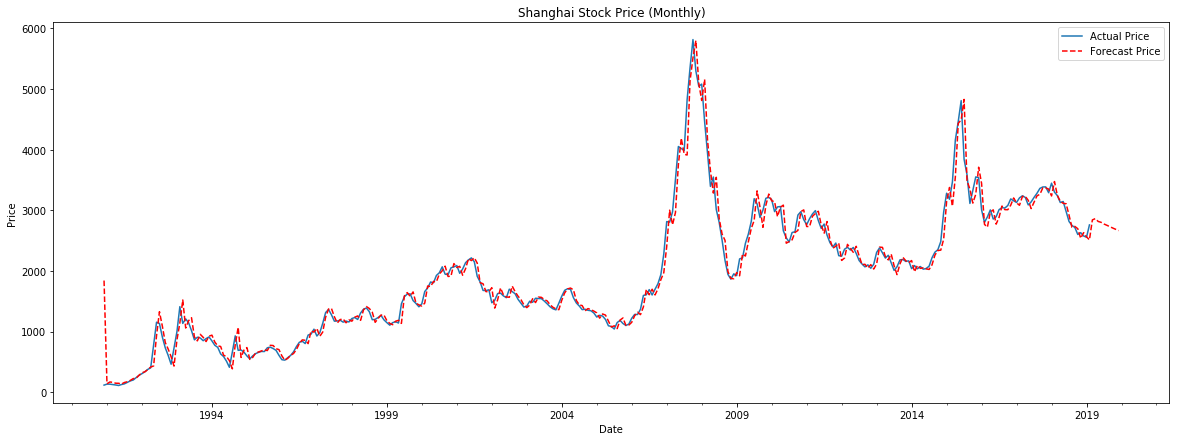

In [11]:
plt.figure(figsize=[20,7])
df_month2.Price.plot(label='Actual Price')
df_month2.forecast.plot(color='r', ls='--', label='Forecast Price')
plt.legend()
plt.title('Shanghai Stock Price (Monthly)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()